In [46]:
# Author: James Meehan
# Date: 8/15/2018
# Description: Machine learning model to predict fantasy scores for tight ends

# import libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from sklearn import preprocessing

In [47]:
# pull in data, separate into data stack, labels, and actual scores
df = pd.read_csv('TERev2.csv', sep=',', )
pts_targets = df
labels = df

labels = labels.loc[0:, 'fname':'actual']
labels = labels.values

df = df.loc[0:, 'rating':'retd_2wk']
pts_targets = pts_targets.loc[0:, 'actual']

df = df.values
df.shape

(1170, 18)

In [48]:
# normalize the inputs
scaled_inputs = preprocessing.scale(df)
print(scaled_inputs)

samples_count = scaled_inputs.shape[0]

# split into training and test groups (80% training / 20% test)
train_samples = int(0.8*samples_count)
test_samples = int(samples_count - train_samples)

train_inputs = scaled_inputs[:train_samples]
train_targets = pts_targets[:train_samples]

test_inputs = scaled_inputs[train_samples:]
test_targets = pts_targets[train_samples:]

[[-1.10156641 -1.01030955 -1.13683875 ... -0.23592163 -0.45864572
  -0.54618914]
 [-0.41065149 -1.01030955 -1.25326364 ... -0.23592163 -0.35836875
   1.33334409]
 [-1.23974939 -1.01030955 -0.17633338 ...  1.15581771  0.04273913
  -0.54618914]
 ...
 [-1.65429835 -1.01030955 -0.04867602 ... -0.69983474 -1.29428713
  -0.54618914]
 [ 1.38572732 -1.01030955 -0.35097072 ... -0.69983474 -0.72605097
  -0.54618914]
 [-0.13428552  0.98979565  0.63864088 ...  1.15581771  0.54412398
   1.33334409]]


In [49]:
print("Training set: {}".format(train_inputs.shape))  # 936 examples, 18 features
print("Testing set:  {}".format(test_inputs.shape))   # 234 examples, 18 features

Training set: (936, 18)
Testing set:  (234, 18)


In [51]:
# build the model. Testing and refining the model found that a neural network with 1 hidden layer and 35 neurons
# produced the best result
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(35, activation=tf.nn.relu, 
                       input_shape=(train_inputs.shape[1],)),
   #keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])
  #AdamOptimizer
  optimizer = tf.train.AdamOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 35)                665       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 36        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

# Store training stats
history = model.fit(train_inputs, train_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................

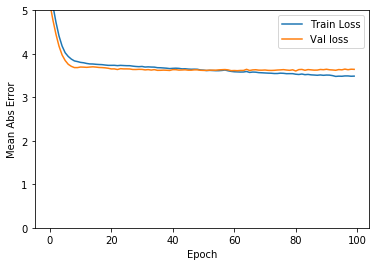

In [53]:
# graph training
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)

In [56]:
# calculate performance
[loss, mae] = model.evaluate(test_inputs, test_targets, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))
print("Testing set Mean Squared Error: {:7.2f}".format(loss))

Testing set Mean Abs Error:    3.52
Testing set Mean Squared Error:   18.48


In [57]:
# get predictions
test_predictions = model.predict(test_inputs).flatten()

print(test_predictions)

[ 4.813982   3.4808195  7.2161026  5.6145115  3.1993678  7.209779
  6.1496506  9.344775   4.0771937  6.7135963  3.572618   8.385457
  3.5861616  4.8235464  5.428066   4.702954   5.356881   6.957812
  6.59861    7.550263   4.8389297  4.41354    6.8531456  4.809974
  5.0448723  3.4106476  3.3365378  4.1622877  4.8076296  7.075863
  5.3075213  4.9962416  5.4288745 12.526305   5.501505   3.5993729
  4.6361046  5.0698204  7.606502   4.506018   6.448119   9.953408
  4.976348   5.781387   4.4204655  2.3397524  3.3872561  4.701484
  4.968713   6.6580896  4.66012    8.663569   5.9952016  6.025504
  5.27372    4.663427   5.8525624  6.540646   5.926647   6.820113
  6.847501   4.566986   7.3194027  2.9002213  4.298301   7.06736
  4.8686814  2.9084423  7.23176    5.7578864  5.286661  10.4390955
  9.618506   5.764123   4.7754436  3.4128911  8.168582   4.8210764
  3.7114854  4.6716943  6.0509415  3.7233407  5.281189   5.629134
  6.020959   5.3343444  7.200756   6.666122   6.1489177  8.782133
  4.8712

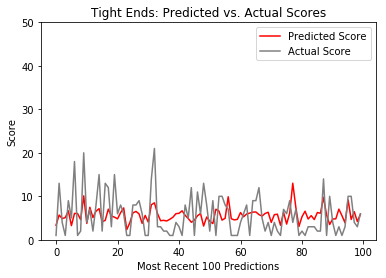

In [62]:
# graph predicted vs. actual scores 
def plot_predict():
  plt.figure()
  plt.title('Tight Ends: Predicted vs. Actual Scores')
  plt.xlabel('Most Recent 100 Predictions')
  plt.ylabel('Score')
  plt.plot(np.array(test_predictions[120:220]), label = "Predicted Score", color="red")
  plt.plot(np.array(test_targets[120:220]), label = "Actual Score", color="grey")
  plt.legend()
  plt.ylim([0,50])

plot_predict()

In [17]:
TEtest_labels = labels[train_samples:]

In [18]:
print(test_predictions)

[ 3.2038004  5.3463054  7.3374467  5.5554953  3.1017296  7.1673927
  5.695336   7.5601926  4.1483326  7.811996   2.3437276  7.167156
  2.1866376  3.8547442  6.127282   2.4856434  4.245209   7.394983
  6.3455873  7.346121   7.9047494  4.383968   8.152704   3.1877882
  5.2634864  5.229849   4.481186   3.3628986  3.7959878  6.3195486
  5.728247   5.621284   4.0911274 13.029577   5.176672   3.302224
  4.379805   6.9645467  6.634529   4.8852286  8.119101  11.479382
  3.6098301  5.7209196  4.7143073  2.7358646  2.8805623  4.6498923
  4.3593326  7.6884427  3.9507515 10.014947   7.1191792  6.895551
  6.024608   4.5761914  4.894466   6.4702806  5.665142   7.0302963
  6.643425   3.8726711  9.138894   2.4510028  3.7724218  5.817813
  4.614804   5.5770082  7.716916   5.958968   3.8738341  9.416336
 11.183332   3.981931   4.6153674  3.396346   9.568024   4.6999044
  2.52755    6.12673    6.2424803  0.8507544  4.9554973  3.447479
  5.398466   6.487732   8.312923   8.374551   7.5404854 11.131934
  3.

In [19]:
fullList = []

for i in range(len(test_predictions)):
    mylist = []
    mylist.append(TEtest_labels[i][0])
    mylist.append(TEtest_labels[i][1])
    mylist.append(TEtest_labels[i][2])
    mylist.append(TEtest_labels[i][3])
    mylist.append(TEtest_labels[i][4])
    mylist.append(test_predictions[i])
    fullList.append(mylist)
print (fullList)

[[' George', ' Kittle', 5, 2017, 14, 3.2038004], [' Jared', ' Cook', 5, 2017, 1, 5.3463054], [' Jason', ' Witten', 5, 2017, 5, 7.3374467], [' Jermaine', ' Gresham', 5, 2017, 1, 5.5554953], [' Jesse', ' James', 5, 2017, 2, 3.1017296], [' Jimmy', ' Graham', 5, 2017, 9, 7.1673927], [' Julius', ' Thomas', 5, 2017, 1, 5.695336], [' Kyle', ' Rudolph', 5, 2017, 10, 7.5601926], [' Lance', ' Kendricks', 5, 2017, 2, 4.1483326], [' Martellus', ' Bennett', 5, 2017, 5, 7.811996], [' Stephen', ' Anderson', 5, 2017, 6, 2.3437276], [' Travis', ' Kelce', 5, 2017, 9, 7.167156], [' Tyler', ' Higbee', 5, 2017, 9, 2.1866376], [' Tyler', ' Kroft', 5, 2017, 3, 3.8547442], [' Zach', ' Ertz', 5, 2017, 12, 6.127282], [' Zach', ' Miller', 5, 2017, 9, 2.4856434], [' Antonio', ' Gates', 6, 2017, 1, 4.245209], [' Austin', ' Seferian-Jenkins', 6, 2017, 9, 7.394983], [' Benjamin', ' Watson', 6, 2017, 2, 6.3455873], [' Cameron', ' Brate', 6, 2017, 13, 7.346121], [' Darren', ' Fells', 6, 2017, 8, 7.9047494], [' Dion', 

In [20]:
import csv
from pandas import read_csv 

with open("TEtestOutput.csv","w",newline="") as newFile: 
    cw = csv.writer(newFile, delimiter=',')
    for i in fullList:
        cw.writerow(i)
        
TEformat = read_csv('TEtestOutput.csv', sep=',')
TEformat.columns = ['fname', 'lname', 'week', 'yr', 'actual', 'predicted']
        
TEformat.to_csv('TEtestOutput.csv', index=False)

In [50]:
import psycopg2
conn = psycopg2.connect(database="Cepheus_db",
                        user="db_usr",
                        password="B3av3rs1!",
                        host="osucepheus.cgwruhobay1w.us-east-2.rds.amazonaws.com",
                        port="5432")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [18]:
#Create cursor with which to execute queries
cur = conn.cursor()

In [19]:
#parse csv
with open ('TEtestOutput.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        #build query string
        query1 = 'INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES '
        query2 =row['fname'], row['lname'], row['week'], row['yr'], row['actual'], row['predicted']
        query = str(query1) + str(query2)
        print(query)
        #execute query
        cur.execute(query)
#commit change
conn.commit()

INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Jared', ' Cook', '5', '2017', '1', '4.058483')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Jason', ' Witten', '5', '2017', '5', '7.6972337')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Jermaine', ' Gresham', '5', '2017', '1', '5.9198103')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Jesse', ' James', '5', '2017', '2', '3.4329447999999996')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Jimmy', ' Graham', '5', '2017', '9', '5.24863')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Julius', ' Thomas', '5', '2017', '1', '5.987009')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Kyle', ' Rudolph', '5', '2017', '10', '8.453198')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Lance', ' Kendricks', '5', '2017', 

INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Jimmy', ' Graham', '11', '2017', '13', '6.7718563')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Julius', ' Thomas', '11', '2017', '3', '7.769557000000001')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Levine', ' Toilolo', '11', '2017', '9', '3.1190124')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Marcedes', ' Lewis', '11', '2017', '8', '5.2856107')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Stephen', ' Anderson', '11', '2017', '2', '6.028351')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Tyler', ' Kroft', '11', '2017', '7', '3.334623')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Vernon', ' Davis', '11', '2017', '6', '6.924288000000001')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Austin', ' H

In [ ]:
# import training data
training_predictions = model.predict(train_inputs).flatten()
#training_predictions.shape

In [47]:
trainList = []

for i in range(270, 936):
    mylist = []
    mylist.append(labels[i][0])
    mylist.append(labels[i][1])
    mylist.append(labels[i][2])
    mylist.append(labels[i][3])
    mylist.append(labels[i][4])
    mylist.append(training_predictions[i])
    trainList.append(mylist)
print (trainList)

[[' Anthony', ' Fasano', 3, 2015, 2, 3.2070537], [' Benjamin', ' Watson', 3, 2015, 3, 5.299648], [' Charles', ' Clay', 3, 2015, 14, 6.122452], [' Crockett', ' Gillmore', 3, 2015, 4, 4.433827], [' Eric', ' Ebron', 3, 2015, 6, 4.8278728], [' Garrett', ' Celek', 3, 2015, 2, 4.0587664], [' Gary', ' Barnidge', 3, 2015, 16, 7.7695904], [' Greg', ' Olsen', 3, 2015, 25, 10.871887], [' Heath', ' Miller', 3, 2015, 1, 2.6657534], [' Jason', ' Witten', 3, 2015, 6, 7.1408935], [' Jermaine', ' Gresham', 3, 2015, 3, 5.310406], [' Jimmy', ' Graham', 3, 2015, 14, 12.701981], [' Jordan', ' Cameron', 3, 2015, 1, 5.3529367], [' Jordan', ' Reed', 3, 2015, 9, 8.109447], [' Kyle', ' Rudolph', 3, 2015, 1, 6.8879843], [' Lance', ' Kendricks', 3, 2015, 1, 3.623309], [' Larry', ' Donnell', 3, 2015, 3, 6.969794], [' Martellus', ' Bennett', 3, 2015, 1, 9.290345], [' Maxx', ' Williams', 3, 2015, 4, 5.1285653], [' Owen', ' Daniels', 3, 2015, 8, 4.8936615], [' Richard', ' Rodgers', 3, 2015, 1, 5.570252], [' Rob', ' G

In [48]:
import csv
from pandas import read_csv 

with open("TEtrainOutput.csv","w",newline="") as newFile: 
    cw = csv.writer(newFile, delimiter=',')
    for i in trainList:
        cw.writerow(i)
        
TEformat = read_csv('TEtrainOutput.csv', sep=',')
TEformat.columns = ['fname', 'lname', 'week', 'yr', 'actual', 'predicted']
        
TEformat.to_csv('TEtrainOutput.csv', index=False)

In [51]:
# put training predict data into database
#Create cursor with which to execute queries
cur = conn.cursor()

#parse csv
with open ('TEtrainOutput.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        #build query string
        query1 = 'INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES '
        query2 =row['fname'], row['lname'], row['week'], row['yr'], row['actual'], row['predicted']
        query = str(query1) + str(query2)
        print(query)
        #execute query
        cur.execute(query)
#commit change
conn.commit()



INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Benjamin', ' Watson', '3', '2015', '3', '5.299648')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Charles', ' Clay', '3', '2015', '14', '6.122452')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Crockett', ' Gillmore', '3', '2015', '4', '4.433827')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Eric', ' Ebron', '3', '2015', '6', '4.8278728')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Garrett', ' Celek', '3', '2015', '2', '4.0587664')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Gary', ' Barnidge', '3', '2015', '16', '7.769590400000001')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Greg', ' Olsen', '3', '2015', '25', '10.871887')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Heath', ' Miller', '3', '201

INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Mychal', ' Rivera', '12', '2015', '2', '5.224856')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Owen', ' Daniels', '12', '2015', '4', '3.6049597')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Rhett', ' Ellison', '12', '2015', '2', '3.8952029')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Richard', ' Rodgers', '12', '2015', '3', '5.1287355')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Rob', ' Gronkowski', '12', '2015', '14', '12.956192')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Ryan', ' Griffin', '12', '2015', '13', '6.961714999999999')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Scott', ' Chandler', '12', '2015', '11', '4.859261')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Travis', ' Kelce'

INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Will', ' Tye', '5', '2016', '3', '4.896578')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Zach', ' Miller', '5', '2016', '7', '5.309532')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Charles', ' Clay', '6', '2016', '5', '5.363134')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' CJ', ' Fiedorowicz', '6', '2016', '14', '6.854205599999999')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Delanie', ' Walker', '6', '2016', '2', '8.77624')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Dennis', ' Pitta', '6', '2016', '3', '5.559996')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Dion', ' Sims', '6', '2016', '1', '1.8058835')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Gary', ' Barnidge', '6', '2016', '5', '7.26

INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Clive', ' Walford', '16', '2016', '8', '4.3424244000000005')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Coby', ' Fleener', '16', '2016', '3', '9.423521000000001')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Delanie', ' Walker', '16', '2016', '8', '10.029421000000001')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Dennis', ' Pitta', '16', '2016', '7', '5.46213')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Dion', ' Sims', '16', '2016', '1', '5.8583913')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Eric', ' Ebron', '16', '2016', '9', '7.683855499999999')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES (' Garrett', ' Celek', '16', '2016', '3', '4.648261499999999')
INSERT INTO te_results(fname, lname, week, yr, actual, predicted) VALUES